In [1]:
#Импортируем необходимые библиотеки

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
rcParams['figure.figsize'] = 15, 8
%matplotlib inline

In [92]:
#Импортируем необходимые данные
Tariff_plans_change = pd.read_csv('Tariff_plans_change.csv', parse_dates=['START_DTTM', 'END_DTTM'])
Charges = pd.read_csv('Charges.csv', index_col='SUBSCRIBER_ID', parse_dates=['BILL_MONTH'])
Suspended = pd.read_csv('Suspended.csv', index_col='SUBSCRIBER_ID', parse_dates=['START_DT', 'END_DT'])

In [91]:
Tariff_plans_change.head(10)

,SUBSCRIBER_ID,TARIFF_PLAN_ID,START_DTTM,END_DTTM
0,1,2,2013-11-22 21:10:08,2017-03-11 14:24:17
1,1,3,2017-03-11 14:24:18,$null$
2,2,1,2016-02-05 16:36:34,2017-06-29 12:39:58
3,2,5,2017-06-29 12:39:59,$null$
4,3,1,2015-05-06 19:17:46,2017-04-14 12:00:59
5,3,5,2017-04-14 12:01:00,$null$
6,4,3,2016-01-27 23:03:51,2017-01-09 19:27:50
7,4,5,2017-01-09 19:27:51,$null$
8,5,1,2016-02-06 08:07:15,2017-05-08 12:39:59
9,5,5,2017-05-08 12:40:00,$null$


## Предподготовка и анализ направления смены тарифных планов

In [52]:
df1 = Tariff_plans_change.groupby(['SUBSCRIBER_ID']).aggregate({'START_DTTM':'min', 'TARIFF_PLAN_ID':'first'}) \
                            .rename(columns={'START_DTTM':'START_DTTM_1', 'TARIFF_PLAN_ID':'TARIFF_PLAN_ID_1'})

In [53]:
df2 = Tariff_plans_change.groupby(['SUBSCRIBER_ID']).aggregate({'START_DTTM':'max', 'TARIFF_PLAN_ID':'last'}) \
                            .rename(columns={'START_DTTM':'START_DTTM_2', 'TARIFF_PLAN_ID':'TARIFF_PLAN_ID_2'})

In [62]:
Tariff_plans_change_transform = df1.join(df2, on='SUBSCRIBER_ID')

In [63]:
Tariff_plans_change_transform.head()

,START_DTTM_1,TARIFF_PLAN_ID_1,START_DTTM_2,TARIFF_PLAN_ID_2
SUBSCRIBER_ID,,,,
1,2013-11-22 21:10:08,2,2017-03-11 14:24:18,3
2,2016-02-05 16:36:34,1,2017-06-29 12:39:59,5
3,2015-05-06 19:17:46,1,2017-04-14 12:01:00,5
4,2016-01-27 23:03:51,3,2017-01-09 19:27:51,5
5,2016-02-06 08:07:15,1,2017-05-08 12:40:00,5


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EC2FA279C8>,
      dtype=object)

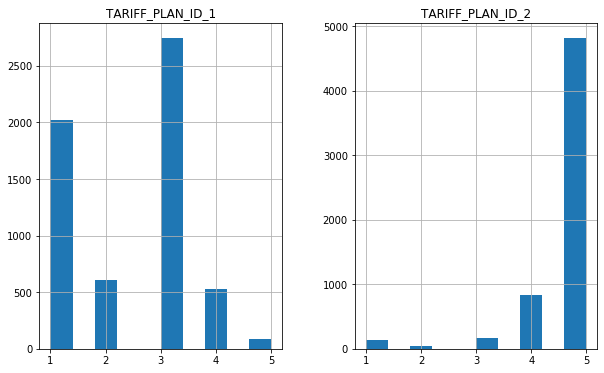

In [75]:
#Построение гистограмм смены тарифных планов
rcParams['figure.figsize'] = 10, 6
Tariff_plans_change_transform[['TARIFF_PLAN_ID_1', 'TARIFF_PLAN_ID_2']].hist()

Наиболее часто уходили с тарифных планов №1 и 3. Наиболее часто переходили на тарифный план №5